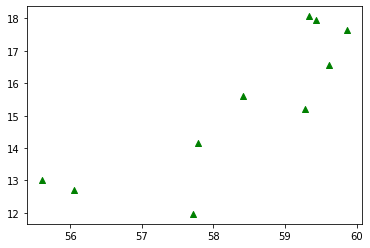

In [2]:
#-- coordinate of cities (10 cities in Sweden)
class City():
    def __init__(self, x, y):
        self._x = x
        self._y = y

    @property
    def point(self):
        return (self._x, self._y)

    @property
    def x(self):
        return self._x
        
    @property
    def y(self):
        return self._y
    
    @property
    def comp(self):
        return complex(self._x, self._y)


import matplotlib.pyplot as plt
class Cities():
    def __init__(self):
        self._places = []

    @property
    def places(self):
        return self._places

    @places.setter
    def cities(self, lCity):
        try:
            assert( isinstance(lCity, list) )
            # assert( isinstance(c, City) for c in lCity ) 
            self._places = lCity
        except:
            raise ValueError('lCity must be a list')
    
    def scatter(self):
        s = set( [place.point for place in self._places] )
        x, y = zip( *s )
        plt.scatter(x, y, marker='^', c='green')

    def scatterShow(self):
        self.scatter()
        # plt.xlim([0, 80])
        # plt.ylim([0, 20])
        plt.show()
    

Stockholm = City(59.329, 18.069)
Gothenburg = City(57.707, 11.967)
Malmo = City(55.606, 13.001)
Uppsala = City(59.859, 17.639)
Sollentuna = City(59.428, 17.951)
Vasteras = City(59.616, 16.553)
Orebro = City(59.274, 15.207)
Linkoping = City(58.411, 15.622)
Helsingborg = City(56.047, 12.694)
Jonkoping = City(57.781, 14.156)

vCities = Cities()
vCities.cities = [Stockholm, Gothenburg, Malmo, Uppsala, 
                    Sollentuna, Vasteras, Orebro, Linkoping, 
                    Helsingborg, Jonkoping] 
vCities.scatterShow()


In [78]:
import cmath
import math
import operator
from itertools import permutations

#-- distances (permutation)
#-- All tours algrorithm. Random sets of cities. All non-redundant tours algorithm (Pick a start)
#-- Calculate polar coordiantes 
class polarCoord():
    def __init__(self, cities):
        self.polar = []
        try:
            assert( isinstance(cities, Cities) )
            self.places = cities.places
            self.polar = [ self.polarPair(place) for place in self.places ]
            self.points = [ place.point for place in self.places]
            # print( self.polar, '\n', self.points, '\n' )
        except:
            raise ValueError('Cities must belong to Cities')
            
    def polarPair(self, city):
        return cmath.polar( city.comp )

    def sort(self):
        R, Theta = zip( *(self.polar) )
        self.sortR = sorted(enumerate(R), key=operator.itemgetter(1)) 
        self.sortRIdx = [item[0] for item in self.sortR]
        self.reorderPointR = [self.points[i] for i in self.sortRIdx]
        # print( 'sortR:', self.sortR, '\n', 'sortRIdx:', self.sortRIdx, '\n', 'reorderPointR:', self.reorderPointR, '\n' )
        print( 'sortRIdx:', self.sortRIdx )

        self.sortTheta = sorted(enumerate(Theta), key=operator.itemgetter(1))
        self.sortThetaIdx = [item[0] for item in self.sortTheta]
        self.reorderPointTheta = [self.points[i] for i in self.sortThetaIdx]
        print( 'sortThetaIdx:', self.sortThetaIdx )
    
    def compare(self):
        RIdx, ThetaIdx = self.sortRIdx, self.sortThetaIdx
        self.sortIdx = []
        length = len(RIdx)
        distance = 0
        for i in range(length - 1):
            if i == 0:
                self.sortIdx.append( RIdx[0] )
                ThetaIdx.remove(RIdx[0])
                RIdx.remove(RIdx[0])
            
            if RIdx[0] == ThetaIdx[0]:
                minDist = math.dist( self.points[RIdx[0]], self.points[RIdx[0]] )
                minIdx = RIdx[0]
            else:
                perm = list( zip( list(set(RIdx[:3] + ThetaIdx[:3])), [self.sortIdx[i], self.sortIdx[i], self.sortIdx[i]]) )
                dist = [math.dist(self.points[pair[0]], self.points[pair[1]]) for pair in perm]
                minDist = min( dist )
                minIdx = dist.index( minDist )

            print( 'RIdx: \n', RIdx, 'ThetaIdx: \n', ThetaIdx )
            print( 'dist: \n', dist, 'minIdx: \n', minIdx )
            distance = distance + minDist

            self.sortIdx.append( RIdx[minIdx] )
            ThetaIdx.remove(RIdx[minIdx])
            RIdx.remove(RIdx[minIdx])
        
        distance = distance + math.dist( self.points[self.sortIdx[0]], self.points[self.sortIdx[-1]])
        print( 'sortIdx: \n', self.sortIdx, 'distance: \n', distance )
        self.reorderPointRTheta = [self.points[i] for i in self.sortIdx]


    def polarPlot(self):
        fig, ax = plt.subplots( subplot_kw={'projection': 'polar'} )
        s = set( self.sortByDist )
        r, theta = zip( *s )
        ax.plot(theta, r)
        rmin, rmax = self.sortByDist[0][0], self.sortByDist[-1][0]
        ax.set_rlim(rmin, rmax)       
    
    def polarPlotShow(self):
        self.polarPlot( )
        plt.show()

    def sortPointPlot(self, R=0):
        if R == 0:
            x, y = zip(*(self.reorderPointR))
            plt.plot(x, y, 'bo')
            plt.plot(x, y, color='green', linewidth=2)
        elif R == 1:
            x, y = zip(*(self.reorderPointTheta))
            plt.plot(x, y, 'bo')
            plt.plot(x, y, color='green', linewidth=2)        
        else:            
            x, y = zip(*(self.reorderPointRTheta))
            plt.plot(x, y, 'bo')
            plt.plot(x, y, color='black', linewidth=2)


    def sortPointPlotShow(self, R=True):
        self.sortPointPlot(R)
        plt.show()

vCityPolar = polarCoord( vCities )
vCityPolar.sort( )
vCityPolar.compare( )
# vCityPolar.polarPlotShow( )
vCityPolar.sortPointPlotShow(R=0)
vCityPolar.sortPointPlotShow(R=2)


sortRIdx: [2, 8, 1, 9, 7, 6, 5, 0, 4, 3]
sortThetaIdx: [1, 8, 2, 9, 6, 7, 5, 3, 4, 0]
RIdx: 
 [8, 1, 9, 7, 6, 5, 0, 4, 3] ThetaIdx: 
 [1, 8, 9, 6, 7, 5, 3, 4, 0]
dist: 
 [0.5373360214986477, 2.3416568920317924, 2.46265101059813] minIdx: 
 0
RIdx: 
 [1, 9, 7, 6, 5, 0, 4, 3] ThetaIdx: 
 [1, 9, 6, 7, 5, 3, 4, 0]
dist: 
 [0.5373360214986477, 2.3416568920317924, 2.46265101059813] minIdx: 
 1
RIdx: 
 [1, 7, 6, 5, 0, 4, 3] ThetaIdx: 
 [1, 6, 7, 5, 3, 4, 0]
dist: 
 [0.5373360214986477, 2.3416568920317924, 2.46265101059813] minIdx: 
 1
RIdx: 
 [1, 6, 5, 0, 4, 3] ThetaIdx: 
 [1, 6, 5, 3, 4, 0]
dist: 
 [0.5373360214986477, 2.3416568920317924, 2.46265101059813] minIdx: 
 1
RIdx: 
 [1, 5, 0, 4, 3] ThetaIdx: 
 [1, 5, 3, 4, 0]
dist: 
 [0.5373360214986477, 2.3416568920317924, 2.46265101059813] minIdx: 
 1
RIdx: 
 [1, 0, 4, 3] ThetaIdx: 
 [1, 3, 4, 0]
dist: 
 [0.5373360214986477, 2.3416568920317924, 2.46265101059813] minIdx: 
 1
RIdx: 
 [1, 4, 3] ThetaIdx: 
 [1, 3, 4]
dist: 
 [0.5373360214986477, 2.341

IndexError: list index out of range